# Введение в PyTorch

## PyTorch



PyTorch — это один из самых популярных на сегодняшний день фреймворков для глубокого обучения. "Популярный" в том плане, что на сегодняшний день большая часть кода, связанная с нейросетями, пишется на PyTorch. Таким популярным этот фреймворк сделало то, что с PyTorch очень удобно работать. Как мы увидим далее, работа с PyTorch очень похожа на работу с Numpy. Также у PyTorch очень удобные и информативные [документация](https://pytorch.org/docs/stable/index.html) и [туториалы](https://pytorch.org/tutorials/).

Небольшой экскурс по фреймворкам для глубокого обучения:

- **Caffee, Theano, Lasagne** — уже практически не используются;
- **Tensorflow** — фреймворк от Google, который был популярен до 2017-2018 года перед появлением PyTorch. В то время большинство кода, связанного с нейросетями, писалась на нем. Однако он был довольно сложен, поэтому PyTorch быстро перехватил лидерство.

    У Tensorflow есть также "обертка" Keras, которая позволяет более просто работать с нейросетями. Однако Keras менее гибок, чем PyTorch, поэтому не может полноценно его заменить.

    Также в 2019 году вышел Tensorflow 2.0, в котором работа с нейросетями была сильно упрощена. Но к тому моменту рынок уже захватил PyTorch, поэтому Tensorflow 2.0 популярен так и не стал.

- **PyTorch**;
- **JAX** — новый фреймворк от Google, призванный заменить Tensorflow.

### torch.Tensor

Базовой единицей фреймворка является структура, которая называется `torch.Tensor`. Tensor - это аналог `numpy.array`, многие методы работы с `torch.Tensor` в точности повторяют методы `numpy array`.

Тензор — это тот тип данных, с которыми работают все нейросети в PyTorch. Матрицы весов слоев сети — это тензоры. Данные, которые мы подаем на вход сети тоже обязательно должны быть приведены к типу `torch.Tensor`. Ну и выход сети, разумеется, тоже будет иметь тип `torch.Tensor`.

Импортируем библиотеку и рассмотрим типичные способы создания тензоров.

In [ ]:
import torch

1. Тензоры можно создавать из листов, массивов и других контейнеров Python.

In [ ]:
x_list = [1., 2., 3.]
x_tensor = torch.tensor(x_list)
x_tensor

2. Тензоры можно создавать при помощи инициализирующих функций, как в `numpy`.

In [ ]:
# тензор из нулей заданного размера
zeros_tensor = torch.zeros(2, 3)
zeros_tensor

In [ ]:
# тензор из единиц заданного размера
ones_tensor = torch.ones(2, 3)
ones_tensor

In [ ]:
# тензор — единичная матрица заданного размера
eye_tensor = torch.eye(6)
eye_tensor

3. Вообще практически все методы, которые есть у Numpy массивов, есть и у torch.Tensor. С тензорами также можно производить операции:

In [ ]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

y_tensor = torch.tensor([
    [-10, 3],
    [5, -4]
])

In [ ]:
x_tensor + y_tensor

In [ ]:
x_tensor * y_tensor

In [ ]:
# матричное умножение
x_tensor @ y_tensor

In [ ]:
# аналог np.concatenate([x_tensor, y_tensor], axis=1)
torch.cat([x_tensor, y_tensor], dim=0)

4. Тензоры можно переводить обратно в формат Numpy или питоновских значений

In [ ]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_numpy = x_tensor.numpy()
x_numpy

In [ ]:
# многомерный тензор
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_tensor.tolist()

In [ ]:
# одномерный тензор
x_tensor = torch.tensor([3])

x_tensor.item()

## Нейронная сеть на Pytorch

Давайте научимся создавать полносвязную нейросеть на Pytorch.

Нейронные сети в Pytorch создаются по типу конструктора: есть набор стандартных блоков из которых мы можем собрать итоговую модель. Простейшие из этих блоков — линейные слои и функции активации.



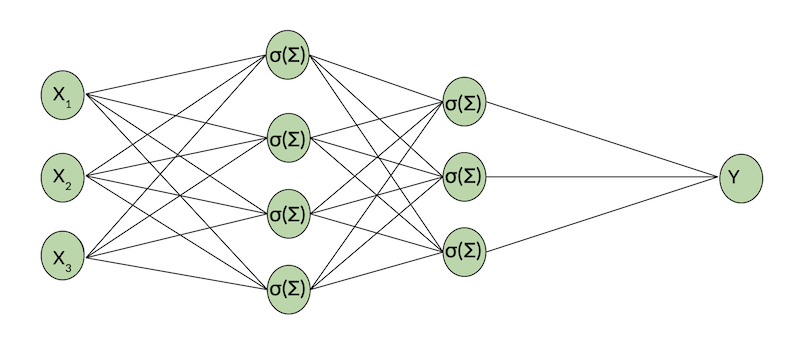

Слой, представляющий из себя линейное преобразование задаётся при помощи класса `torch.nn.Linear`. Давайте создадим слой с 5 входными и 3 выходными нейронами.

In [ ]:
# модуль, в котором определены все классы слоев сетей и функций активации
import torch.nn as nn

n = 5
m = 3
# аргумент bias принимает значения True и False и определяет, будет ли в слое
# применяться bias. Если bias=False, вектор байеса равен нулю
linear_layer = nn.Linear(n, m, bias=True)

In [ ]:
linear_layer

Далее — функция активации. Многие известные функции активации реализованы в модуле `nn` и продублированы в модуле `nn.functional`. Выберем какую-нибудь из них, например, гиперболический тангенс (tanh).

In [ ]:
# Можно использовать такой вариант:

# import torch.nn.functional as F
# activation = F.tanh

# или такой вариант:
activation = nn.Tanh()

In [ ]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])
activation(x_tensor)

Теперь проход некоторого тензора с данными через такой полносвязный слой будет задан при помощи последовательности команд:

In [ ]:
random_input = torch.rand(5)

x = linear_layer(random_input)
output = activation(x)
output

Обратим внимание на `grad_fn=<TanhBackward0>`. Такая приписка будет появляться на всех тензорах, которые являются обучающими параметрами в нейросети. Это значит, что для данного тензора в процессе обучения сети будет вычисляться градиент, с помощью которого значения тензора будут обновляться.

Отлично, мы научились использовать отдельные слои из PyTorch. Давайте теперь на их основе соберем полносвязную нейросеть.

### Полносвязная нейросеть для бинарной классификации

Зададим датасет для бинарной классификации точек на плоскости:

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# генерируем 1200 точек, распределенных вокруг двух центров: (-2,0.5) и (3,-0.5)
X, y = make_blobs(n_samples=1200, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

# отрисовываем точки на плоскости, покрасив их в два цвета в зависимости от класса
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)

Давайте зададим нейронную сеть с двумя слоями. Пусть в скрытых слоях будет пять нейронов. В качестве функции активации выберем сигмоиду.

Нейросеть задается в виде класса, который наследуется от абстрактного класса Module. Для задания нейросети достаточно определить у класса методы `__init__ `и `__forward__`. В методе `__init__ ` обычно прописываются слои и артибуты сети, а в `__forward__` — то, как нейросеть будет обрабатывать данные, поданные ей на вход.

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 2)
        self.act1 = nn.Sigmoid() # можно заменить на nn.Tanh / nn.ReLU / ...

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):
        """
        params:
            x (torch.Tensor): данные, поданные на вход сети
        """

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Заведем нейросеть:

In [ ]:
model = Net()

Посмотрим, что умеет наша необученная нейросеть. Получим ее ответы на тестовой выборке и визуализируем, к какому классу наша нейросеть отнесла какие точки тестовой выборки.

In [ ]:
nn_prediction = model(torch.FloatTensor(X_test))

nn_prediction = nn_prediction.tolist()

Переведем предсказания сети из вероятностей в формат нулей и единиц:

In [ ]:
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

Визуализируем точки тестовой выборки и покрасим их в цвета в зависимости от того, к какому классу сеть отнесла эти точки:

In [ ]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

Полученный результат ожидаем, поскольку наша нейронная сеть не обучена. Давайте обучим её.


### Обучение нейронной сети в Pytorch

При написании класса сети в PyTorch нам не нужно реализовывать логику обучения сети. Внутри PyTorch алгоритм вычисления частных производных лосс-функции по весам сети реализован с помощью модуля [autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html). На основе строения функции сети, заданной в forward, autograd понимает, как выглядит граф вычислений сети, и при вызове backward у последнего элемента графа (лосс-функции), проходит по графу в обратном направлении, вычисляя все градиенты.

Поэтому давайте перейдем к написанию функции `train` для обучения нашей нейронной сети.

**В обучении сети участвуют следующие сущности:**
- сама нейросеть
- лосс-функция
- оптимизатор (optimizer)

**Что такое оптимизатор:**

Оптимизатор — это сущность, которая отвечает за обновление параметров сети на основе их текущих значений и значений их производных, т.е. отвечает за шаг обучения сети.

При вызове метода .backward() лосс-функции для всех весов сети вычисляются производные. После этого оптимизатор обновляет все веса сети с помощью этих вычисленных производных.

Тут может возникнуть вопрос: зачем нужна отдельная сущность "оптимизатор" для такой простой операции обновления весов? Казалось бы, всего-то нужно для каждого параметра сети отнять от его старого значения значение его производной, умноженной на learning rate. Почему PyTorch Autograd не делает это сразу во время выччисления производных?

Ответ тут такой: существуют разные алгоритмы обновления весов сети, т.е. разные алгоритмы оптимизации весов. Стохастический градиентный спуск — это базовый, самый простой вариант. К нему можно добавить некоторые трюки, которые сделают обучение сети еще эффективнее. И чтобы можно было обучать одну и ту же сеть с помощью разных алгоритмов оптимизации, за алгоритм оптимизации отвечает отдельная сущность — optimizer. Ниже мы увидим, как выбирать тот или иной optimizer для обучения сети.


Итак, теперь мы готовы реализовать функцию обучения сети. Реализуем для начала обычный градиентный спуск:

In [ ]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        # Вычислим предсказания нашей модели
        y_pred = model(X)

        # Посчитаем значение функции потерь  на полученном предсказании
        loss = criterion(y_pred, y)

        # Выполним подсчёт новых градиентов
        loss.backward()
        # Выполним шаг градиентного спуска
        optimizer.step()
        # Обнулим сохраненные у оптимизатора значения градиентов
        # перед следующим шагом обучения
        optimizer.zero_grad()

    return model

Снова объявим нашу сеть:

In [ ]:
model = Net()

Объявим лосс-функцию и оптимизатор, и обучим сеть на 30 эпохах:

In [ ]:
# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1) # size [1000] -> [1000, 1]

model = train(model, X_train, y_train, criterion, optimizer, 20)

Посмотрим теперь, каков будет результат.

In [ ]:
with torch.no_grad():
    nn_prediction = model(torch.FloatTensor(X_test))
    nn_prediction = nn_prediction.tolist()

nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

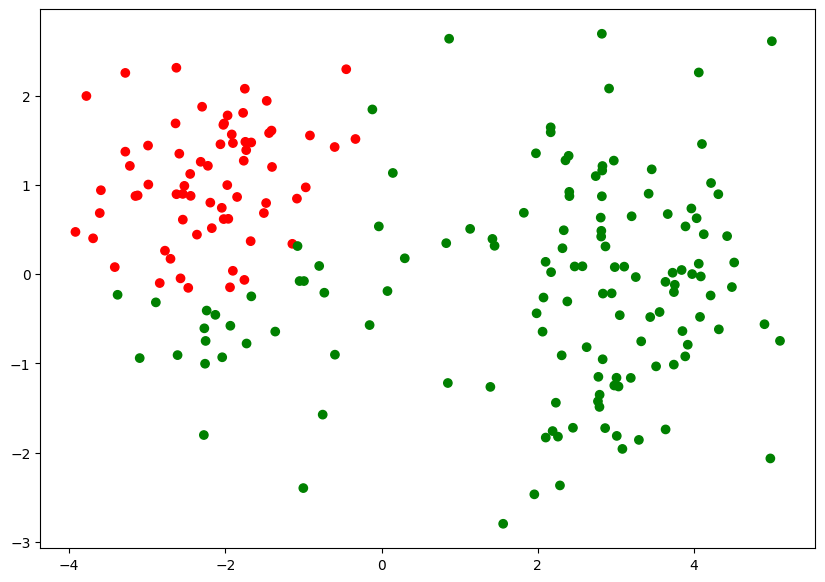

In [ ]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

Покрасим все точки плоскости в цвета в зависимости от того, в какой класс наша сеть отнесла бы эти точки. Так мы лучше увидим разделяющую поверхность:

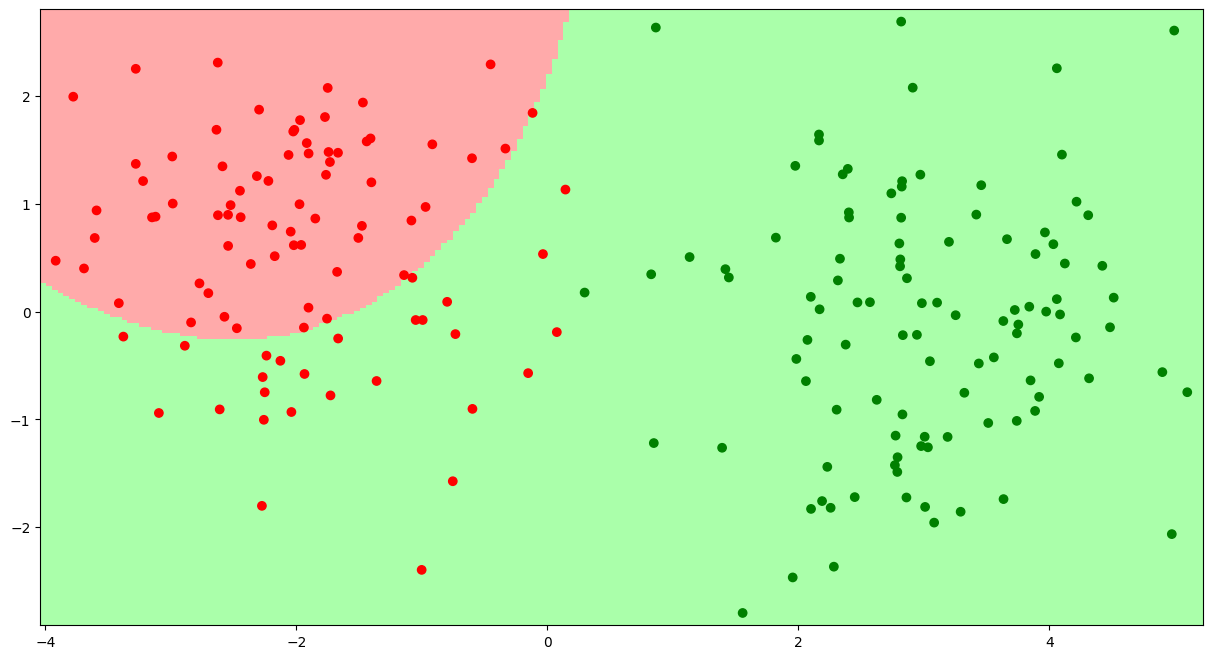

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))
Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

### Dataloader и обучение по мини-батчам

Dataloader — это сущность, которая выполнял функционал разделения данных на мини-батчи для подачи в сеть. В PyTorch нам такого самим писать опять же не нужно, тут уже есть специальный класс Dataloader. Давайте заведем даталоадеры для тренировочных и тестовых данных.

Даталоадер принимает на вход данные в виде массива пар [($x_1$, $y_1$), ..., ($x_i$, $y_i$), ...]

In [ ]:
train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=False)

Здесь:
- batch_size — размер батча, на которые даталоадер будет делить данные перед каждой эпохой;
- shuffle — если True, то перед каждой эпохой и делением на батчи данные будут перемешаны. Shuffle обычно ставится True для обучающих данных, и False для тестовых.

Нам нужно также немного изменить функцию обучения сети, чтобы реализовать обучение по мини-батчам:

In [ ]:
import tqdm
from tqdm.auto import tqdm

def train_stochastic(model, loader, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        loader - dataloader
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # цикл по батчам даталоадера
        for X_batch, y_batch in loader:
            # Вычислим предсказания нашей модели
            y_pred = model(X_batch)

            # Посчитаем значение функции потерь  на полученном предсказании
            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())

            # Выполним подсчёт новых градиентов
            loss.backward()
            # Выполним шаг градиентного спуска
            optimizer.step()
            # Обнулим сохраненные у оптимизатора значения градиентов
            # перед следующим шагом обучения
            optimizer.zero_grad()

        print("curr_loss", np.mean(epoch_loss))

    return model

Снова заведем сеть, лосс-функцию, оптимизатор, и начнем обучение:

In [ ]:
model = Net()

# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(NN.parameters(), lr=1e-4)

In [ ]:
model = train_stochastic(model, train_loader, criterion, optimizer, 30)

  0%|          | 0/30 [00:00<?, ?it/s]

curr_loss 0.812592189759016
curr_loss 0.8111005797982216
curr_loss 0.8105967976152897
curr_loss 0.8092063367366791
curr_loss 0.807930763810873
curr_loss 0.8070170469582081
curr_loss 0.8060115240514278
curr_loss 0.8049045540392399
curr_loss 0.8034865371882915
curr_loss 0.8027256093919277
curr_loss 0.8019924014806747
curr_loss 0.8004001341760159
curr_loss 0.7995900064706802
curr_loss 0.7986551187932491
curr_loss 0.7975054197013378
curr_loss 0.7966778315603733
curr_loss 0.7959827594459057
curr_loss 0.7946134880185127
curr_loss 0.7936346903443336
curr_loss 0.7928584553301334
curr_loss 0.792193565517664
curr_loss 0.7909000404179096
curr_loss 0.790083970874548
curr_loss 0.7893042527139187
curr_loss 0.7881824932992458
curr_loss 0.7873369678854942
curr_loss 0.7863448821008205
curr_loss 0.7854679636657238
curr_loss 0.7849242128431797
curr_loss 0.7841537855565548


Посмотрим, как теперь наша модель делит плоскость на части по классам:

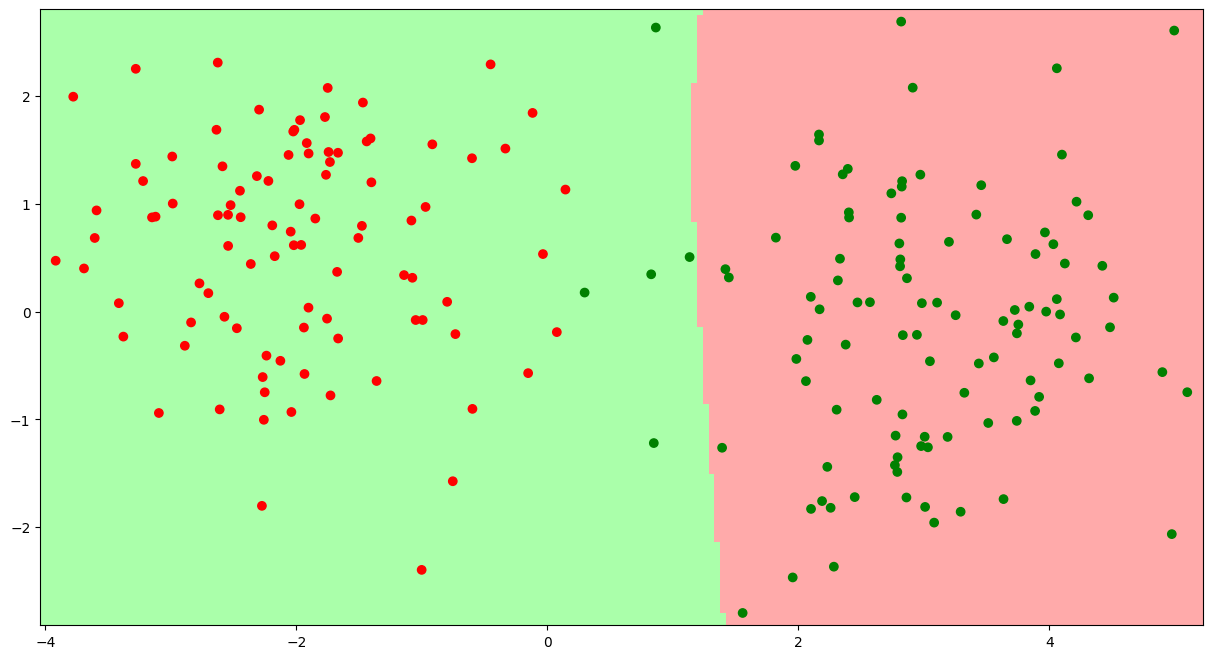

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))

Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

## nn.Sequential

Давайте еще раз посмотрим на то, как мы задавали нашу нейросеть:

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 2)
        self.act1 = nn.Sigmoid()

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

В PyTorch есть еще один способ задания структуры нейросети, через nn.Sequential. Выглядит это так:

In [ ]:
model = nn.Sequential(
                   nn.Linear(2, 2, bias=True),
                   nn.Sigmoid(),
                   nn.Linear(2, 1, bias=True),
                   nn.Sigmoid()
                   )

Теперь с переменной model можно обращаться точно так же, как мы делали это выше. Эту сеть можно обучить и получать ответы на тестовых данных.



Этот способ создания сети выглядит проще (не нужно писать никакой класс и никакой forward), но он менее гибок. Дело в том, что, используя nn.Sequential, мы задаем только слои сети, и выполняться они будут при вызове сети ровно в том порядке, в котором мы их задали. Отсюда и название структуры Sequential — "последовательный". В случае же описания сети в виде класса мы могли в forward определять вид прохождения входа по сети сами. Например, могли бы сделать такую нейросеть:

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc11 = nn.Linear(2, 2)
        self.act11 = nn.Sigmoid()

        self.fc12 = nn.Linear(2, 2)
        self.act12 = nn.Sigmoid()

        self.fc2 = nn.Linear(4, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x1, x2):

        x1 = self.fc11(x1)
        x1 = self.act11(x1)

        x2 = self.fc12(x2)
        x2 = self.act12(x2)

        x = torch.cat([x1, x2], dim=1)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Или можно даже делать так:

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc11 = nn.Linear(2, 2)
        self.act11 = nn.Sigmoid()

        self.fc12 = nn.Linear(2, 2)
        self.act12 = nn.Sigmoid()

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x, mode='left'):

        if mode == 'left':
            x = self.fc11(x)
            x = self.act11(x)

        elif mode == 'right':
            x = self.fc12(x2)
            x = self.act12(x2)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Таким образом, при задании сети в виде класса у нас ест бОльшая гибкость в определении того, как сеть будет обрабатывать входные данные на каждой новой итерации.


Но, несмотря на это, nn.Sequential все-таки используется при создании сетей. Он часто используется внутри метода __init__, чтобы сгруппировать несколько слоев сети в блок. Например, вот так:

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.left_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )

        self.right_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )

        self.bottom_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )


    def forward(self, x, mode='left'):

        if mode == 'left':
            x = self.left_block(x)

        elif mode == 'right':
            x = self.right_block(x)

        x = self.bottom_block(x)
        return x

Это становится особенно удобно при написании глубоких сетей, у которых много слоев. Мы еще увидим, как это используется, на примере глубоких сверточных сетей в 4 модуле курса.

## Dataset

В примере этого ноутбука выше мы подавали на вход даталоадеру данные в виде массива пар тензоров:

In [ ]:
list(zip(X_train, y_train))[:5]

[(tensor([2.3733, 0.3624]), tensor([1.])),
 (tensor([ 1.1064, -0.2867]), tensor([1.])),
 (tensor([-3.5152,  1.8669]), tensor([0.])),
 (tensor([-2.0196,  1.0525]), tensor([0.])),
 (tensor([ 1.2742, -1.1776]), tensor([1.]))]

In [ ]:
train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=False)

Но мы могли подавать в даталоадер данные по-другому — в виде объекта класса [Dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). Dataset — это класс, который реализует функционал хранения и обработки данных перед передачей их в даталоадер. В домашней работе и следующих занятиях мы научимся загружать некоторые датасеты из PyTorch, и все загружаемые датасеты будут представлять собой объекты класса Dataset.

В нашем случае Dataset выглядел бы так:

In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, X, y):
        '''
        метод для создается класса
        '''
        self.X = X
        self.y = y

    def __len__(self):
        '''
        метод, который возвращает количество элементов датасета.
        Этот метод использует dataloader для формирования батчей данных
        '''
        return len(self.X)

    def __getitem__(self, idx):
        '''
        метод, который по заданному индексу idx возвращает элемент датасета,
        соответствующий индексу. Этот метод использует dataloader для
        формирования батчей данных
        '''
        x_curr = self.X[idx]
        y_curr = self.y[idx]

        return (x_curr, y_curr)

In [ ]:
train_set = CustomDataset(X_train, y_train)
test_set = CustomDataset(X_test, y_test)

In [ ]:
# здесь вызывается метод __getitem__
train_set[9]

(tensor([ 1.3991, -1.3285]), tensor([1.]))

In [ ]:
# здесь вызывается метод __len__
len(train_set), len(test_set)

(1000, 200)

И теперь на основе train_set и test_set можно создать даталоадеры:

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

Даталоадер работает с датасетом так: он понимает, сколько всего элементов в датасете (метод __len__), и перед началом каждой эпохи перемешивает индексы, если shuffle=True. Далее на каждой итерации он формирует батч из batch_size индексов и получает набор элементов по этим индексам с из датасета (метод __getitem__).

Тут снова может возникнуть вопрос: зачем нужна такая сложная структура, если можно передавать в dataloader сам датасет в виде массива тензоров? На то есть несколько причин:
-  Допустим, что наш датасет очень большой. Представим, например, что мы решаем задачу классификации изображений, и в нашем датасете миллион картинок. Нам просто не хватит оперативной памяти, чтобы загрузить все эти картинки и передать их dataloader'у в виде массива. Плюс, загрузка будет идти очень долго, и если мы по какой-то причине захотим перезапустить ноутбук, нам нужно будет снова загружать все картинки в пямять перед началом обучения сети. С помощью Dataset же можно сделать так, чтобы нужные картинки подгружались "на лету" при формировании каждого батча. Ниже мы увидим, как это можно сделать.
- С помощью Dataset можно "на лету" применять к данным из датасета любые преобразования. Пусть, например, в нашем датасете картинок все картинки разных размеров (так оно обычно и бывает в реальности), а мы хотим обучать нейросеть на картинках размера 256х256. Мы могли бы заранее загрузить все картинки из датасета, поменять их размер, и сохранить в отдельную папку на диске. Но это долго и требует лишней памяти на диске. Более того, если мы потом по какой-то причине захотим поменять разрешение картинок, скажем, на 512х512, то нам придется проделывать все то же самое снова. А кроме размера с картинками можно делать еще очень много различных преобразований, которые улучшают обучение сети (подробнее про это мы поговорим в модулях, где будет работать с картинками). В общем, это неэффективно. Dataset же позволяет делать любые такие преобразования "на лету" в методе __getitem__

Вот как примерно может выглядеть Dataset для картинок:

In [ ]:
from torch.utils.data import Dataset
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, images_paths, images_labels):
        '''
        метод для создается класса.
        images_paths — массив с путями к картинками датасета на диске
            ['/dataset/images/0.jpg',
             '/dataset/images/01.jpg',
             ...]
        images_labels — массив с ответами для картинок из images_paths
            ['1',
             '13',
             ...]
        '''
        self.images_paths = images_paths
        self.images_labels = images_labels

    def __len__(self):
        '''
        метод, который возвращает количество элементов датасета.
        Этот метод использует dataloader для формирования батчей данных
        '''
        return len(self.images_labels)

    def __getitem__(self, idx):
        '''
        метод, который по заданному индексу idx возвращает элемент датасета,
        соответствующий индексу. Этот метод использует dataloader для
        формирования батчей данных
        '''

        # получаем путь к картинке с индексом idx
        image_path = self.X[idx]
        # открываем картинку
        image = Image.open(image_path)
        # предобрабатываем картинку
        image = image.resize((256, 256))

        # получаем label картинки
        label = self.y[self.images_labels]

        # отдаем пару (картинка, label)
        return (torch.tensor(image), label)

Конечно, необходимость писать свой Dataset есть не всегда. Часто объект типа Dataset можно создать автоматически. Мы познакомимся с разными вариантами работы с данными в PyTorch далее в курсе.

## Полезные ссылки

- [Datasets & Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) (PyTorch docs)
- [Torch.autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) (PyTorch docs)